# Shooting Stars Space Tech Coding Activity

### Introduction
Welcome to the coding activity of the Shooting Stars Space Tech activity kit. Here we will show you how to practically use the basics of machine learning you just learned in a real world example.

#### Why predict error?
In this example we will be processing positions of different object flying around in LEO.
These object range from satellites, payloads, space junk, etc. A physical model has been created by
astrophysicists to estimate the future position of these objects.
However, since this physical model is purely theoretical, it does not take into account all the things that
could affect a sapce object, like solar wind, and other space weather.
Therefore this physical model will have some error to it.
We, in turn, will be estimating what amount of error we expect
the physical model will have when it predicts where the object is in LEO
With this estimation of error, we can better understand where the object
will *actually* be in the future and prevent any catastrophic conjunctions
(crashes).

### Importing libraries
Lets get started!
With those of you familiar with a coding environment,
you must first import all libraries you will use in your script.

In [2]:
from IPython.display import clear_output
# install required libraries
!pip install -r requirements.txt
clear_output()
import pandas

### The Data
#### Pandas
Next, we will get familiar with pandas, a useful library in Python that
is great for data science and manipulating large amounts of data.
Pandas takes many file formats (excel, csv, parquet, and more) and
turns them into a DataFrame, which is just a representation of our data.
For this part we will be using a parquet file and putting it into a
dataframe.

#### Parquet files
A parquet file is a special serialized file that holds compresses data
(to save storage space). This parquet file we are loading now has
lots of data that we will use to train our machine learning model.
We use the pandas library to load a parquet file into a
variable called `df`.

#### Real satellite data
Our data for this ML model comes from
[this website](www.space-track.org). Please take a look at it if you are
interested.

In [4]:
space_data = pandas.read_parquet('orbital_predict_data/physics_preds_20201023_EDITED.parquet')

After we have loaded the data from the parquet file into a local variable, we can look at some of the columns and rows listed in the data frame.

In [5]:
space_data

,epoch,aso_name,aso_id,r_x,r_y,object_type,start_epoch,start_r_x,start_r_y,elapsed_seconds,physics_pred_r_x,physics_pred_r_y,physics_err_r_x,physics_err_r_y
0,2020-09-25 16:47:28.076,COSMOS 909,10010,-1.783030e+06,-8.208743e+06,payload,2020-09-24 11:31:40.753,-1.446152e+06,-8.277359e+06,105347.322144,-1.525834e+06,-8.215337e+06,2.571959e+05,-6593.767333
1,2020-09-25 10:56:18.613,COSMOS 909,10010,-1.715884e+06,-8.223570e+06,payload,2020-09-24 11:31:40.753,-1.446152e+06,-8.277359e+06,84277.859616,-1.510850e+06,-8.231060e+06,2.050344e+05,-7490.018486
2,2020-09-28 07:13:08.987,COSMOS 909,10010,-2.490278e+06,-8.016655e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,154509.369696,-2.109646e+06,-8.042023e+06,3.806322e+05,-25367.348509
3,2020-09-27 15:36:43.765,COSMOS 909,10010,-2.315127e+06,-8.070455e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,98324.147808,-2.075787e+06,-8.093311e+06,2.393397e+05,-22856.445677
4,2020-09-27 09:45:34.306,COSMOS 909,10010,-2.249146e+06,-8.089643e+06,payload,2020-09-26 12:17:59.618,-2.005868e+06,-8.155362e+06,77254.688736,-2.061879e+06,-8.109596e+06,1.872673e+05,-19952.181174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637322,2020-10-17 18:18:29.815,THORAD DELTA 1 DEB,9989,-3.690649e+06,-2.754086e+06,debris,2020-10-17 04:25:58.836,4.600393e+06,-5.966865e+04,49950.978911,-3.383725e+06,-2.701697e+06,3.069238e+05,52388.613995
637323,2020-10-22 11:58:02.084,THORAD DELTA 1 DEB,9989,3.106347e+06,-4.464325e+05,debris,2020-10-20 03:56:11.196,3.628298e+06,-3.157527e+05,201710.888064,4.759157e+06,5.157482e+05,1.652810e+06,962180.768523
637324,2020-10-22 04:14:24.131,THORAD DELTA 1 DEB,9989,3.152882e+06,-4.393782e+05,debris,2020-10-20 03:56:11.196,3.628298e+06,-3.157527e+05,173892.934944,4.594637e+06,3.821484e+05,1.441754e+06,821526.566759
637325,2020-10-21 04:50:52.869,THORAD DELTA 1 DEB,9989,6.718411e+06,1.823389e+06,debris,2020-10-20 03:56:11.196,3.628298e+06,-3.157527e+05,89681.673312,7.032861e+06,2.161258e+06,3.144500e+05,337869.246733


637326 rows? That's a lot of data!

Now that we can view some of the data, lets discuss what some of the
columns mean.
The `aso_name` and `aso_id` are the name and id of the satellite.
This value repeats because we track the same satellite over time.



In [1]:
space_data.object_type.value_counts()

NameError: name 'space_data' is not defined

##### Value Counts
`value_counts` gave us a way to look at that column of data and learn some things about it.    
`object_type` tells us what the object is. Let's take a look at the `object_type` now.
Use value_counts to learn more about the `object_type` column.

##### Renaming Columns
The epoch is the time at which the position `r_x` and
`r_y` was taken. And `r_x` and `r_y` are the cartesian coordinates of
the surface of the earth in 2 dimension.

How about we rename some of the columns so we better understand what they mean?
We will rename `start_r_x` to `initial_r_x` and `epoch` to `final_epoch`

You rename `start_epoch`  to `initial_epoch`, `start_r_y` to `initial_r_y`,  `r_x` to `final_r_x`, and `r_y` to `final_r_y`

In [ ]:
space_data = space_data.rename(columns={'start_r_x': 'initial_r_x', 'epoch': 'final_epoch'})

# ------ Students provide the following line ------
space_data = space_data.rename(columns={'start_epoch': 'initial_epoch', 'start_r_y': 'initial_r_y', 'r_x': 'final_r_x', 'r_y': 'final_r_y'})
# -------------------------------------------------
space_data


#### Building an XGBoost Model
Great. Now its time to build a ML model. 
We will be training an XGBoost Model

XGBoost is a popular model choice because of how versatile it is.    
It is an ensemble learning model, meaning it is composed of many 'smaller models' organised in a tournament structure.     
### Ensemble Learning    
Imagine a machine learning model trying to decide whether someone likes playing computer games.    
In ensemble learning, one tree figures out whether they are a boy or girl, and the second tree finds out if they are older than 15 years old.    
Each individual tree would be a really bad guess at whether someone likes playing computer games, but together they are a little more accurate.    
XGBoost uses many more trees to come up with a better guess.
![image.png](images/xgboost.png)

Great now that you know more about XGBoost, lets take a look at how to implement it.     
The first step is to download more of the libraries we need for the ML model


In [2]:
import os
import logging
import itertools
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

We can add a method that can be called upon with the line `def <name of method>`. This `get_state_vect_cols` will grab the x and the y from the `r_x` and `r_y` variables.

In [10]:
def get_state_vect_cols(prefix):
    """Get the column names of the state vector components with the
    provided `prefix`.
    :param prefix: The prefix that is used in front of the state vector
        components in the column names, examples are `physics_pred` and
        `physics_err`
    :type prefix: str
    :return: A list of the 6 names of the prefixed state vector components
    :rtype: [str]
    """
    vectors = ['r']
    components = ['x', 'y']
    col_names = [f'{prefix}_{v}_{c}'
                 for v, c
                 in itertools.product(vectors, components)]
    return col_names

This method `build_train_test_sets` builds the sets of data that the ML model will use.

In [11]:
def build_train_test_sets(df, test_size=0.2):
    # Features are the physics predicted state vectors and the amount of
    # time in seconds into the future the prediction was made
    feature_cols = ['elapsed_seconds'] + get_state_vect_cols('physics_pred') \
        + get_state_vect_cols('initial')
    # The target values are the errors between the physical model predictions
    # and the ground truth observations
    target_cols = get_state_vect_cols('physics_err')
    # Create feature and target matrices
    X = df[feature_cols]
    y = df[target_cols]
    # Split feature and target data into training and test sets
    data_keys = ['X_train', 'X_test', 'y_train', 'y_test']
    data_vals = train_test_split(X, y, test_size=test_size)
    train_test_data = dict(zip(data_keys, data_vals))
    return train_test_data

The `train_models` method will actually train the models

In [13]:
def train_models(data, params={}, eval_metric='rmse'):
    """Trains gradient boosted regression tree models to estimate the error in
    each of the two state vector components in the physical model prediction
    :param data: Dictionary containing the training and test datasets
    :type data: {str: numpy.array}
    :param params: A dictionary of parameters to pass to the XGBRegressor
        constructor
    :type params: dict
    :param eval_metric: The loss function to use in model training
    :type eval_metric: str
    :return: Dictionary containing the trained models for each state vector
        component
    :rtype: {str: xgboost.XGBRegressor}
    """
    default_params = {
        'booster': 'gbtree',
        'tree_method': 'gpu_hist',
        'gpu_id': 0
    }
    default_params.update(params)
    X, ys = data['X_train'], data['y_train']
    models = {}
    for target_col in ys.columns:
        y = ys[target_col]
        reg = xgb.XGBRegressor(**default_params)
        reg.fit(X, y, eval_metric=eval_metric)
        models[target_col] = reg
    return models

Now the model can be built with the previous methods, we will want to evaluate the model, give us how much error we expect the physcial model to have, and measure how good we expect the model to be. Another way to describe this is how much we can rely on the model to give us a good answer.

We will describe what RMSE and R^2 - the ways to evaluate the model - below.

In [12]:
def eval_models(models, data):
    """Calculates the root mean squared error (RMSE) and the coefficient of
    determination (R^2) for each of the models.
    :param models: Dictionary of the error model for each state vector
        component
    :type models: {str: xgboost.XGBRegressor}
    :param data: Dictionary containing the training and test datasets
    :type data: {str: numpy.array}
    :return: Returns a DataFrame containing the evaluation metric results
    :rtype: pandas.DataFrame
    """
    evals = []
    for target_col, reg in models.items():
        y_hat = reg.predict(data['X_test'])
        y = data['y_test'][target_col]
        rmse = metrics.mean_squared_error(y, y_hat, squared=False)
        r2 = metrics.r2_score(y, y_hat)
        eval_dict = {'Error': target_col, 'RMSE': rmse, 'R^2': r2}
        evals.append(eval_dict)
    return pd.DataFrame(evals)

We will also want a way to view the importance of each varaible in a graphical way. This method `plot_feat_impts` will show us how important each variable is to the error that comes out of the physcial model

In [18]:
def plot_feat_impts(models, data):
    """Plots the feature importances for each of the error models.
    For use in an interactive jupyter session.
    :param models: Dictionary of the error model for each state vector
        component
    :type models: {str: xgboost.XGBRegressor}
    :param data: Dictionary containing the training and test datasets
    :type data: {str: numpy.array}
    """
    feat_names = data['X_train'].columns
    fig, axs = plt.subplots(1, 2, figsize=(10, 10))
    print(models.items())
    for (target_col, model), ax in zip(models.items(), axs.flat):
        feat_imp = pd.Series(model.feature_importances_, index=feat_names)
        feat_imp.sort_values(ascending=False, inplace=True)
        feat_imp.plot(kind='bar', ax=ax, title=target_col)
    plt.ylabel('Feature Importance Score')
    plt.tight_layout()

Finally, we can call the previous methods to build, train, and evaluate our machine learning model.

In [19]:
train_test_data = build_train_test_sets(space_data)
err_models = train_models(train_test_data, params={'tree_method': 'hist'})
eval_models(err_models, train_test_data)

#### This is the final result of this machine learning model. 

The RMSE, or Root Mean Squared Error, shows us an average error we can expect from `physics_err_r_x` and `physics_err_r_y`. 

This means any random sample of `physics_pred_r_x` (for ex `-1.525834e+06`) we can expect an error of about `386486.887353` to the correct sample - final_r_x.


The R^2 value shows us how correlated the training data is to the correct answer.

With the given data that we have, our error predition of `physics_err_r_x` is  52.8 % predictable and `physics_err_r_y` is 44.5% predictable. 

This means we should be able to successfully predict `physics_err_r_x`, or by what amount the physcial model is off, as long as we have a sufficient amount of data (lots of rows of data). If this R^2 was a higher number, then we could use less data (less rows). 

    If R^2 was 1, then we need virtually no data to predict the physics_err, meaning the physical model is perfect.
    For example, the number of miles driven and the amount of money you spend on gas is close to one - they are very correlated so the R^2 is close to 1.

    If R^2 was 0, then there is no amout of data able to predict the physics_err, meaning the physical model is completely wrong.
    For example, the number of ducks in a pond in Wisconsin vs hairs on your head - they are not correlated so the R^2 is close to 0.
    
On a final note, we can view a graphical view of some of the data.

dict_items([('physics_err_r_x', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='hist', validate_parameters=1, verbosity=None)), ('physics_err_r_y', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators

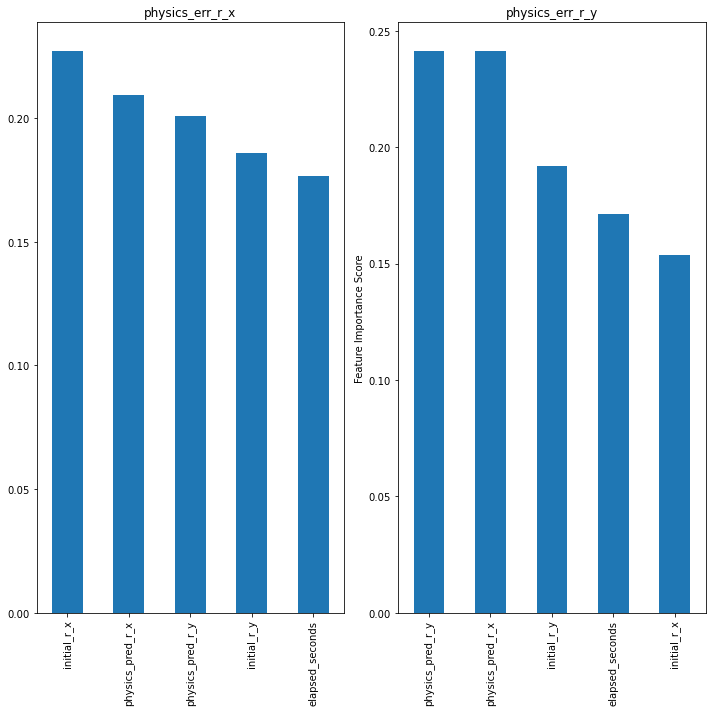

In [21]:
plot_feat_impts(err_models, train_test_data)

XGBoost can tells us the importance of each variable / column in the data set.

A scientist could look at this graph and see that the variable `initial_r_x` is more important to `physics_err_r_x` than the elapsed seconds.